<a href="https://colab.research.google.com/github/Sourav-Manik/Data-Science-Assignment/blob/main/Assignment_12_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
Salary_test_df= pd.read_csv("/content/SalaryData_Test.csv",encoding = "ISO-8859-1")
Salary_test_df.head(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


In [2]:
#EDA
Salary_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [3]:
Salary_test_df.shape

(15060, 14)

In [4]:
#droping columns with numerical values
Salary_test_df=Salary_test_df.drop(['age','educationno','capitalgain','capitalloss','hoursperweek'],axis=1)

In [5]:
Salary_test_df.head(2)

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K


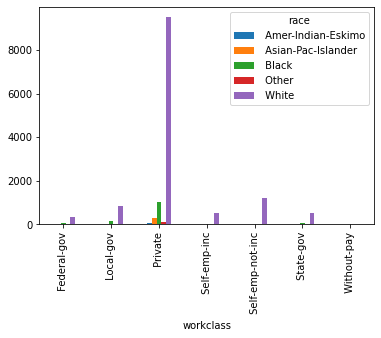

In [6]:
#Vizualizing data
pd.crosstab(Salary_test_df.workclass,Salary_test_df.race).plot(kind="bar")

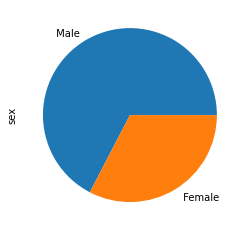

In [7]:
Salary_test_df.sex.value_counts().plot(kind="pie")

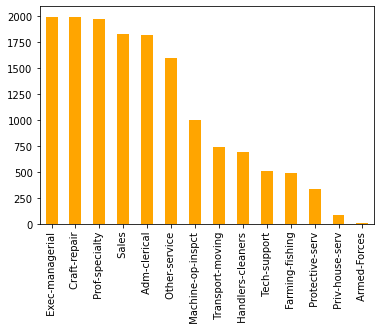

In [8]:
Salary_test_df.occupation.value_counts().plot.bar(color='orange');

In [9]:
Salary_train_df= pd.read_csv("/content/SalaryData_Train.csv",encoding = "ISO-8859-1")
Salary_train_df.head(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [10]:
#EDA
Salary_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [11]:
Salary_train_df.shape

(30161, 14)

In [12]:
#droping columns with numerical values
Salary_train_df=Salary_train_df.drop(['age','educationno','capitalgain','capitalloss','hoursperweek'],axis=1)

In [13]:
Salary_train_df.head(2)

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K


In [14]:
Salary_train_df["workclass"].value_counts()

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [15]:
Salary_train_df["occupation"].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1965
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

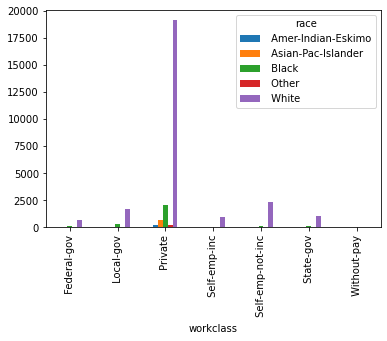

In [16]:
#Vizualizing data
pd.crosstab(Salary_train_df.workclass,Salary_train_df.race).plot(kind="bar")

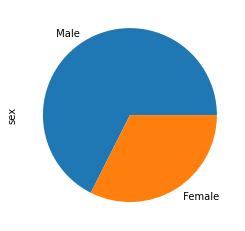

In [17]:
Salary_train_df.sex.value_counts().plot(kind="pie")

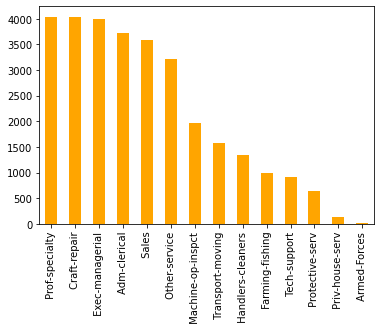

In [18]:
Salary_train_df.occupation.value_counts().plot.bar(color='orange');

In [19]:
# No preprocessing have done because the data is structured.
# combining all the categorical columns for easy computaion.

In [20]:
Salary_test_df['Combined_data'] = Salary_test_df['workclass'] + Salary_test_df['education']+Salary_test_df['maritalstatus'] + Salary_test_df['occupation'] + Salary_test_df['relationship'] + Salary_test_df['race']+ Salary_test_df['sex'] + Salary_test_df['native']                                                     
Salary_test_df.head(2)

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary,Combined_data
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K,Private 11th Never-married Machine-op-inspct ...
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K,Private HS-grad Married-civ-spouse Farming-fi...


In [21]:
Salary_train_df['Combined_data'] = Salary_train_df['workclass'] + Salary_train_df['education']+Salary_train_df['maritalstatus'] + Salary_train_df['occupation'] + Salary_train_df['relationship']+Salary_train_df['race'] + Salary_train_df['sex'] + Salary_train_df['native']
Salary_train_df.head(2)

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary,Combined_data
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K,State-gov Bachelors Never-married Adm-clerica...
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K,Self-emp-not-inc Bachelors Married-civ-spouse...


In [22]:
def split_into_words(i):
    return (i.split(" "))

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
#train data

In [25]:
# Preparing email texts into word count matrix format 
Salary_train_bow = CountVectorizer(analyzer=split_into_words).fit(Salary_train_df.Combined_data)  

In [26]:
# For training messages
Salary_train_matrix = Salary_train_bow.transform(Salary_train_df.Combined_data)
Salary_train_matrix.shape

(30161, 98)

In [27]:
#test data

In [28]:
# Preparing email texts into word count matrix format 
Salary_test_bow = CountVectorizer(analyzer=split_into_words).fit(Salary_test_df.Combined_data)  

In [29]:
# For testing messages
Salary_test_matrix = Salary_test_bow.transform(Salary_test_df.Combined_data)
Salary_test_matrix.shape

(15060, 98)

In [30]:
Salary_train_df.Salary

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
30156     <=50K
30157      >50K
30158     <=50K
30159     <=50K
30160      >50K
Name: Salary, Length: 30161, dtype: object

In [31]:
####### Without TFIDF matrices ########################
# Preparing a naive bayes model on training data set 

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB                                                                             

In [32]:
# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(Salary_train_matrix,Salary_train_df.Salary)

MultinomialNB()

In [33]:
train_pred_m = classifier_mb.predict(Salary_train_matrix)
accuracy_train_m = np.mean(train_pred_m==Salary_train_df.Salary)
accuracy_train_m

0.7911541394516097

In [34]:
test_pred_m = classifier_mb.predict(Salary_test_matrix)
accuracy_test_m = np.mean(test_pred_m==Salary_test_df.Salary)
accuracy_test_m

0.7940239043824702

In [35]:
# Gaussian Naive Bayes 
classifier_gb = GB()
classifier_gb.fit(Salary_train_matrix.toarray(),Salary_train_df.Salary.values) # we need to convert tfidf into array format which is compatible for gaussian naive bayes


GaussianNB()

In [36]:
train_pred_g = classifier_gb.predict(Salary_train_matrix.toarray())
accuracy_train_g = np.mean(train_pred_g==Salary_train_df.Salary)
accuracy_train_g

0.5633102350717815

In [37]:
test_pred_g = classifier_gb.predict(Salary_test_matrix.toarray())
accuracy_test_g = np.mean(test_pred_g==Salary_test_df.Salary)
accuracy_test_g

0.5593625498007968